In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r"C:\Users\91936\Desktop\wine and healthcare\healthcare\healthcare_dataset.csv")
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(10000, 15)
(10000, 15)


In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [4]:
df.drop(['Name','Date of Admission','Room Number','Discharge Date','Insurance Provider'],axis = 1,inplace = True)

In [5]:
for j in df.columns:
    print(j)
    print(df[j].nunique())
    print()

Age
68

Gender
2

Blood Type
8

Medical Condition
6

Doctor
9416

Hospital
8639

Billing Amount
10000

Admission Type
3

Medication
5

Test Results
3



As there are too many Hospitals and Doctors there can't be any pattern with them 

In [6]:
df.drop(['Doctor','Hospital'],axis =1,inplace = True)

In [7]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results
0,81,Female,O-,Diabetes,37490.983364,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,47304.064845,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,36874.896997,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,23303.322092,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,18086.344184,Urgent,Paracetamol,Normal


In [8]:
df[['Gender','Blood Type','Medical Condition','Admission Type','Medication','Test Results']]=df[['Gender','Blood Type','Medical Condition','Admission Type','Medication','Test Results']].apply(LabelEncoder().fit_transform) 

In [9]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results
0,81,0,7,3,37490.983364,0,0,1
1,35,1,6,1,47304.064845,1,2,2
2,61,1,5,5,36874.896997,1,2,2
3,49,1,5,1,23303.322092,2,4,0
4,51,1,7,0,18086.344184,2,3,2


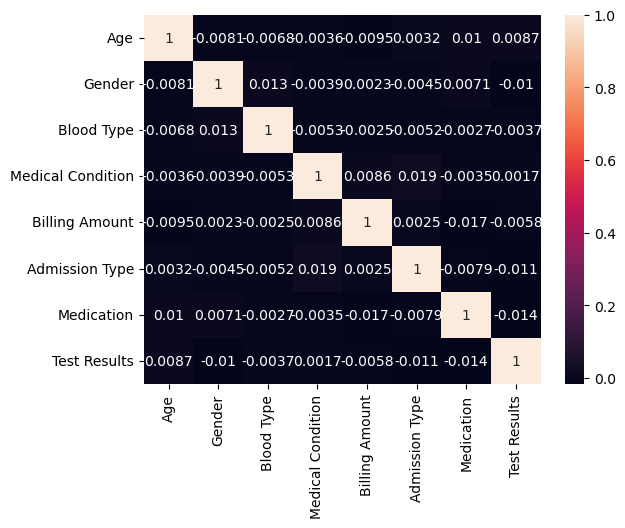

In [11]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [20]:
x = df.drop('Test Results',axis = 1)
y = df['Test Results']

In [21]:
x_train,x_test,y_train,y_test = tt(x,y,random_state = 42)

In [25]:
algo1 = lr()
algo1.fit(x_train,y_train)
y_pred1 = algo1.predict(x_test)
algo1.score(x_test,y_test)

0.3532

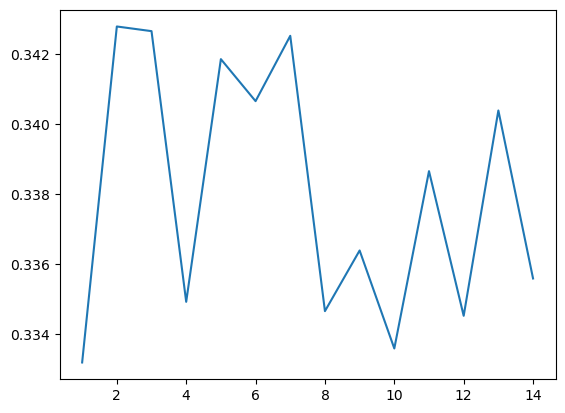

[0.33320000000000005, 0.3428, 0.3426666666666667, 0.33493333333333336, 0.34186666666666665, 0.3406666666666667, 0.3425333333333333, 0.33466666666666667, 0.3364, 0.3336, 0.33866666666666667, 0.33453333333333335, 0.3404, 0.3356]


In [35]:
x_axis = []
y_axis = []

for i in range(1,15):
    k = knn(n_neighbors = i)
    score = cross_val_score(k,x_train,y_train)
    
    x_axis.append(i)
    y_axis.append(score.mean())
    
plt.plot(x_axis,y_axis)
plt.show()
print(y_axis)

In [37]:
algo2 = knn(n_neighbors = 8)
algo2.fit(x_train,y_train)
y_pred2 = algo2.predict(x_test)
score = cross_val_score(algo2,x_test,y_test)
print(score.mean())

0.328


In [40]:
algo3 = dt()
algo3.fit(x_train,y_train)
y_pred3 = algo3.predict(x_test)
algo3.score(x_test,y_test)

0.34

In [45]:
algo4 = rf()
algo4.fit(x_train,y_train)
y_pred4 = algo4.predict(x_test)
algo4.score(x_test,y_test)

0.3476

In [47]:
algo5 = SVC()
algo5.fit(x_train,y_train)
algo5.score(x_test,y_test)

0.3364